# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [113]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [114]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [115]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"])["ride_id"].count()

In [116]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"])["driver_count"].sum()

In [117]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"])["fare"].sum()

In [118]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fares / total_rides

In [119]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fares / total_drivers

In [120]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides, 
    "Total Drivers": total_drivers, 
    "Total Fares": total_fares, 
    "Average Fare per Ride" : avg_fare_per_ride, 
    "Average Fare per Driver" : avg_fare_per_driver})

In [121]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [122]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [123]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [124]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_sum_fares = pyber_data_df.groupby(["type", "date"])[["fare"]].sum()

In [125]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
type_sum_fares_df = type_sum_fares_df.reset_index()

In [126]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_sum_fares_pivot = type_sum_fares_df.pivot(index = "date", 
                                               columns = "type",
                                              values = "fare")
type_sum_fares_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [127]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
four_month_fares_df = type_sum_fares_pivot.loc["2019-01-01" : "2019-04-28"]

In [128]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
four_month_fares_df.index = pd.to_datetime(four_month_fares_df.index)

In [129]:
# 7. Check that the datatype for the index is datetime using df.info()
four_month_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [130]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = four_month_fares_df.resample('W').sum()

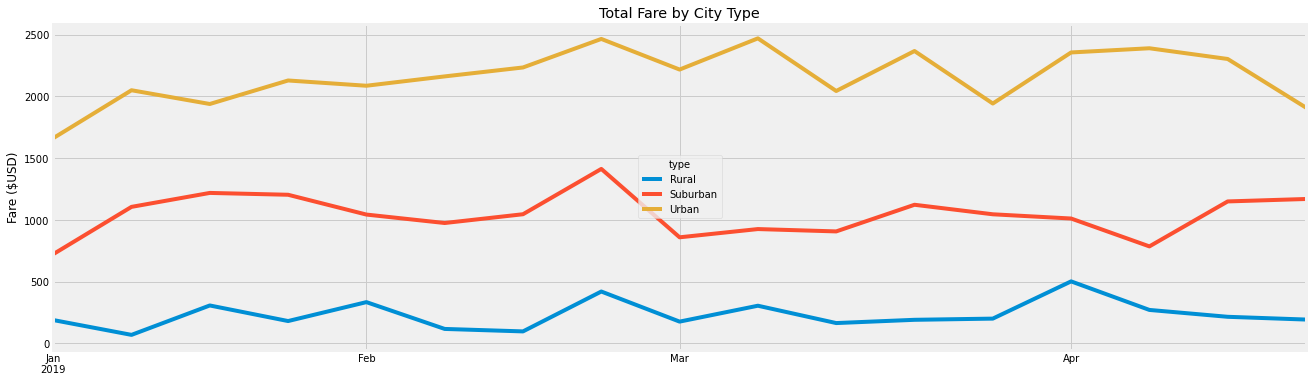

In [131]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
weekly_fares = weekly_fares_df.plot(figsize = (20, 6))
weekly_fares.set_title("Total Fare by City Type")
weekly_fares.set_ylabel("Fare ($USD)")
weekly_fares.set_xlabel("")

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save the figure
plt.savefig("analysis/PyBer_fare_summary.png")